# Astroinformatics "Machine Learning Basics"
## Class 3: 
In this tutorial, we'll see basics concepts of machine learning. (We will not see classification yet, but these concepts applies to those problems too). All this concepts are very well explained in the [Deep Learning Book, Chapter 5](http://www.deeplearningbook.org/contents/ml.html)

First a brief discussion about the frequentist and bayesians approach of machine learning. Then a basic problem of linear regression in order to give some insight about the approach of frequentist and bayesians of this problem and its connection. Then we'll see the concept of capacity, overfitting and underfitting and how to solve it using regularization (explained from a frequentist and bayesian point of view). Finally, we use cross validation to select the hyperparameters of our optimization problem.

# Frequentiest and Bayesians


Please read the discussion in [this great book](http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC3.ipynb), It'll give you a great insight about the difference between the two approaches. I also recommend  [this reading](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading20.pdf) from an MIT class

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

# Linear regression least square

Given some data $(x_{i}, y_{i})_{i=1}^{N}$, we want to find the best affine transformation of $x$ that better predicts $y$, the affine model is $\hat{y} = w^{T}x$ where we add a 1 to $x$ in order to have an offset of the linear model (affine transformation). Let's define $(X,Y)$ as the dataset where each row of $X$ is $x_{i}^{T}$ and $Y$ has $y_{i}$ as components. Now, we define the mean squared error ($MSE$) as our measure of performance of the model:

$$ MSE = \frac{1}{N}\| \hat{Y}-Y \|^{2}_{2} $$

where $\hat{Y}$ is the estimated values of the linear model. In order to find the best model in the least square sense, we can minimize MSE by gradient:

\begin{equation}
\nabla_{w} MSE = 0 \\
\nabla_{w} \frac{1}{N} \| \hat{Y} - Y \|^{2}_{2} = 0 \\
\frac{1}{N} \nabla_{w} \| Xw - Y \|^{2}_{2} = 0 \\
\nabla_{w} (Xw-Y)^{T}(Xw-Y) = 0 \\
\nabla_{w} (w^{T}X^{T}Xw-2w^{T}X^{T}Y-Y^{T}Y) = 0 \\
2X^{T}Xw-2X^{T}Y=0 \\
w = (X^{T}X)^{-1}X^{T}Y
\end{equation}

We know that this is the solution for the linear regression because the $MSE$ is a convex function of $w$m we can check this by taking the second derivative, $\nabla_{w}^{2}MSE = 2X^{T}X$ which is a positive semi definite matrix (the eigenvalues are bigger or equal to zero). In this case, we need all the eigenvalues bigger than zero, if there is at least one eigenvalue equal to zero, that means that the value of the MSE is "flat" in the direction of that eigenvector, when the eigenvalue is "close" to zero, it can produce numerical instability on the optimization (this can be fixed with regularization). Now let's make an example:

(2, 1)
samples shape: (20, 2)
target shape: (20, 1)


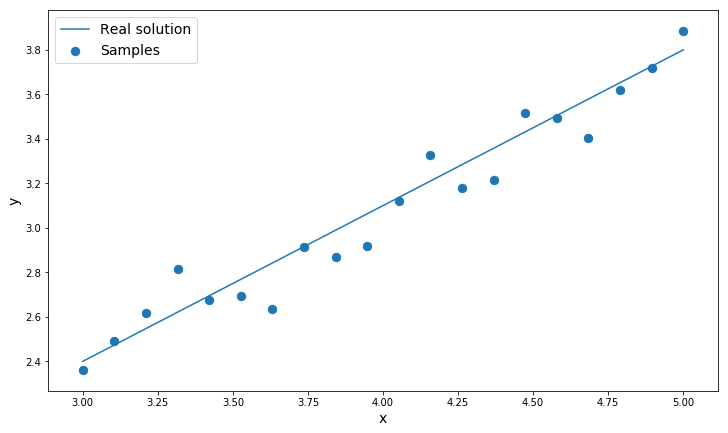

In [2]:
def linear_function(w, x):
    return np.dot(x, w)

w = np.array([0.7, 0.3])[...,np.newaxis]
print(w.shape)
noise = 0.10
n_points = 20
np.random.seed(500)

# we add an extra dimension to make it a column vector
x_samples = np.linspace(3, 5, n_points)[..., np.newaxis]
# then we add a column of ones in order to have the constant term a*x + b*1 = y
augmented_x = np.concatenate([x_samples, np.ones(shape=(n_points,1))], axis=1)
print("samples shape: "+str(augmented_x.shape))
# adding gaussian noise to the data
y_samples = linear_function(w, augmented_x) + np.random.normal(loc=0.0, scale=noise, size=(n_points,1))
print("target shape: "+str(y_samples.shape))
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(x_samples, linear_function(w, augmented_x), label="Real solution")
ax.scatter(x_samples, y_samples, label="Samples", s=70)
ax.legend(fontsize=14)
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
plt.show()

In [3]:
# Least square solution
estimated_w = inv(augmented_x.T @ augmented_x) @ augmented_x.T @ y_samples
# MSE
error = np.linalg.norm(y_samples - linear_function(estimated_w, augmented_x))**2/len(y_samples)
# eigenvectors and eigenvalues of the covariance matrix
eg_values, eg_vectors = np.linalg.eig(augmented_x.T @ augmented_x)
print("estimated w:" +str(estimated_w))
print("mean squared error: "+str(error))
print("eigenvalues: "+str(eg_values))
print("eigenvectos: "+str(eg_vectors))

estimated w:[[ 0.68565289]
 [ 0.33056476]]
mean squared error: 0.0101285040086
eigenvalues: [ 346.94365923    0.42476182]
eigenvectos: [[ 0.97134386 -0.23767859]
 [ 0.23767859  0.97134386]]


In [4]:
# making error maningfold
X_array = np.arange(-1, 2.5, 0.05)
Y_array = np.arange(-1, 2.5, 0.05)
X, Y = np.meshgrid(X_array, Y_array)
Z = np.zeros(shape=(len(X_array), len(Y_array)))

for i, x in enumerate(X_array):
    for j, y in enumerate(Y_array):
        w_loop = np.array([x, y])[..., np.newaxis]
        Z[i, j] = np.linalg.norm(y_samples - linear_function(w_loop, augmented_x))**2/len(y_samples)

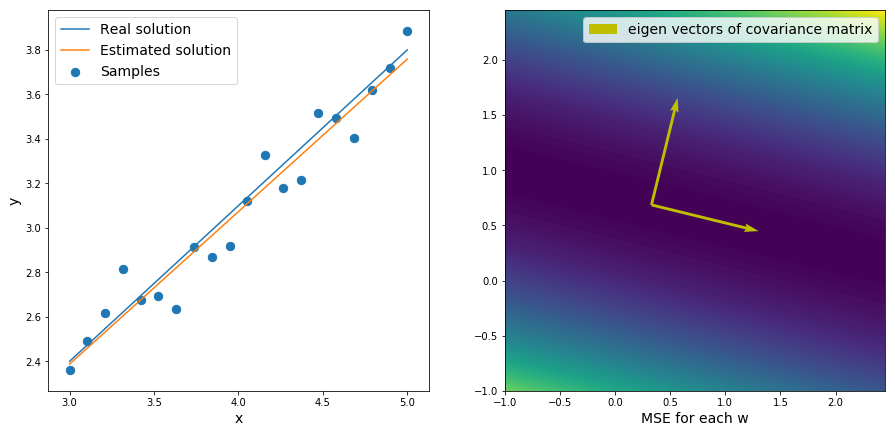

In [5]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15,7))
ax.plot(x_samples, linear_function(w, augmented_x), label="Real solution")
ax.scatter(x_samples, y_samples, label="Samples", s=70)
ax.plot(x_samples, linear_function(estimated_w, augmented_x), label="Estimated solution")
ax.legend(fontsize=14)
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)

levels = np.linspace(0, np.amax(Z), 100)
cont = ax2.contourf(X, Y, Z, levels = levels)#,cmap="inferno")
soa = np.concatenate([np.roll(np.repeat(estimated_w.T, 2, axis=0), shift=1), eg_vectors], axis=1)*1.0
X2, Y2, U, V = zip(*soa)
ax2.quiver(X2, Y2, U, V, angles='xy', scale_units='xy', scale=1,
           color="y", label="eigen vectors of covariance matrix")
ax2.legend(fontsize=14)
ax2.set_xlabel("MSE for each w", fontsize=14)
plt.show()

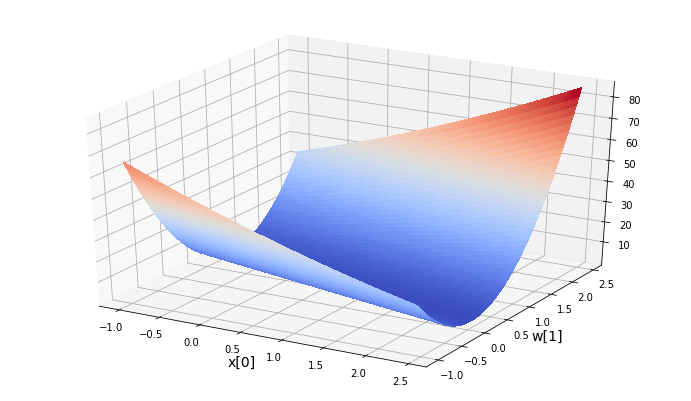

In [6]:
fig = plt.figure(figsize=(12, 7))
ax2 = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax2.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax2.set_ylabel("w[1]", fontsize=14)
ax2.set_xlabel("x[0]", fontsize=14)
plt.show()

As we can see here, there is one direction where the MSE is relatively flat (small eigenvalue), that is why we see little variation in that direction by changing w, but it is still convex enough to have a unique solution. This is a frequentist way to solve a linear regression, is just a data driven solution with the only assumption of the model shape and that the MSE is a good way to measure performance, let's see now what is the bayesian way, which involves some distribution assumptions expressed using probabilities.

# Linear Regression Maximum Likelihood Estimation
Now, we define our model in a probabilistic way, that is, for example:

$$ \hat{y} = w^{T}x + \epsilon \hspace{0.5cm} \text{with} \hspace{0.5cm} \epsilon \sim \mathcal{N}(0, \sigma) $$

This means that we are assuming that the data has gaussian noise of a given variance $\sigma^{2}$. Now, we can write what is the probability of occurrence of the data Y, for a given input X and a model:

$$ P(Y \mid X, w, \sigma) $$

We call this "Likelihood". Now, it is very intuitive that if a particular value of w produces a high probability of seeing the data (high likelihood value), then w is a good choice for our model, so we define the maximum likelihood estimation of w as:

$$ \hat{w} = \text{argmax}_{w}  P(Y \mid X, w, \sigma) = \text{argmax}_{w} \prod_{i}^{N}P(y_{i}, x_{i},w,\sigma) = \text{argmax}_{w} \prod_{i}^{N}\mathcal{N}(y_{i}; wx_{i}, \sigma) $$

where the last equality comes from the assumption of i.i.d samples. Now, this product over many probabilities can produce numerical underflow, so we can obtain a more convenient optimization problem. Instead of maximizing the likelihood, we minimize the "negative log likelihood" which is $NLL = -\log(P(Y \mid X, w, \sigma))$, so the optimization problem is:

$$ \hat{w} = \text{argmin} -\log(P(Y \mid X, w, \sigma)) $$

This expression to minimize arise naturally when we start by the optimization by minimizing the Kullback Leibler divergence between the estimated distribution of the data and the distribution produced by the model (we'll skip this for now). Something interesting happens when we work a little bit the expression of the NLL

\begin{equation}
\begin{split}
NLL = & -\log(\prod_{i}^{N}\mathcal{N}(y_{i}; wx_{i}, \sigma)) \\
= & -\sum_{i=1}^{N}\log(\mathcal{N}(y_{i}; wx_{i}, \sigma))
= & -\sum_{i=1}^{N}\left [ \log \frac{1}{\sqrt{2\pi}\sigma} - \frac{(y_{i}-wx_{i})^{2}}{2 \sigma^{2}} \right ] \propto  \| \hat{Y} - Y \|^{2}_{2}
\end{split}
\end{equation}

Least Mean Squared Error is equivalent to the Maximum Likelihood Estimation when gaussian noise in the data is assumed!!

# Capacity, overfitting and Underfitting

Generally, in machine learning, the purpose of fitting a model to a dataset, is to evaluate the model on new data, not just the one that we use to train the model. The ability to perform well on new data is called generalization.

In order to measure the generalization capacity of a trained model, we subtract a subset of the original dataset which is not used to train the model but to test it. Those sets are called train set (used to find the parameters) and test set (used to measure the generalization performance), then we can estimate the generalization ability of our model by measuring the error (or another metric of performance) on the test set. Here we are assuming that both sets, train and test sets are generated by the same data-generating process, that means i.i.d assumptions over every sample (as we did before in the maximum likelihood case)

The objective of the optimization process is to make the training error small enough and make the gap between the training and test error small. The following concepts are useful to understand this process:

- Capacity: ability of the model to fit a wide variety of functions (like relations between inputs and outputs)
- Overfitting: Occurs when the gap between the training error and test error is too large, when the Capacity of the model is too high compared with the real complexity of the data-generating process
- Underfitting: Happens when the model is not able to obtain a sufficiently low error value on the training set, may occur because the Capacity of the model is not enough to encode the complexity of the data-generating process

Let's understand this with an example using a polinomial fitting over data. In the following example, the true complexity of the data is a quadratic polynomial. We fit models with low and high capacities compare with the real complexity

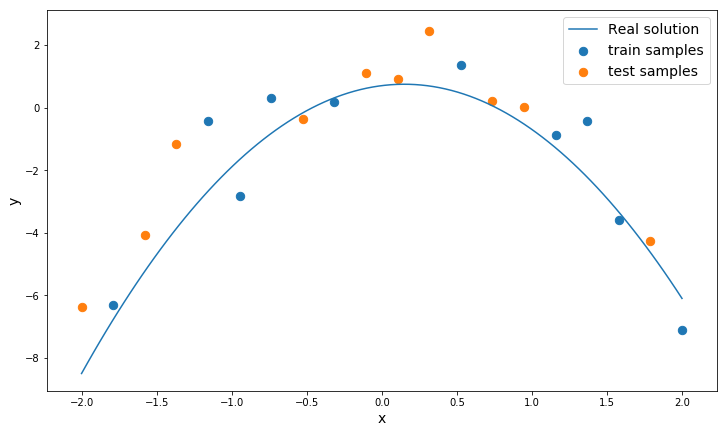

In [7]:
w = np.array([-2, 0.6, 0.7])[...,np.newaxis]
noise = 1.2
n_points = 20
train_size = 10
test_size = n_points - train_size

np.random.seed(0)

x_samples = np.linspace(-2, 2, n_points)[..., np.newaxis]
# Making quadratic polinomial
augmented_x = np.concatenate([x_samples**2, x_samples, x_samples**0], axis=1)
y_samples = linear_function(w, augmented_x) + np.random.normal(loc=0.0, scale=noise, size=(n_points,1))
x_plot = np.linspace(-2,2,100)[..., np.newaxis]
aug_x_plot = np.concatenate([x_plot**2, x_plot, x_plot**0], axis=1)

# Dividing in train and test set
indexes = np.arange(start=0, stop=n_points,step=1)
np.random.shuffle(indexes)
train_index = indexes[:train_size]
test_index = indexes[train_size:]
x_train = x_samples[train_index, ...]
aug_x_train = augmented_x[train_index, ...]
y_train = y_samples[train_index, ...]
x_test = x_samples[test_index, ...]
aug_x_test = augmented_x[test_index, ...]
y_test = y_samples[test_index, ...]

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(x_plot, linear_function(w, aug_x_plot), label="Real solution")
ax.scatter(x_train, y_train, label="train samples", s=70)
ax.scatter(x_test, y_test, label="test samples", s=70)
ax.legend(fontsize=14)
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
plt.show()

In [8]:
# Linear, Quadratic 5 and 10 degree polynomial fit.
linear_coef = np.polyfit(x_train[:, 0], y_train[:, 0], deg=1, full=True) 
qd_coef = np.polyfit(x_train[:, 0], y_train[:, 0], deg=2,full=True)
deg5_coef = np.polyfit(x_train[:, 0], y_train[:, 0], deg=5, full=True) 
deg10_coef = np.polyfit(x_train[:, 0], y_train[:, 0], deg=10, full=True) 
p1 = np.poly1d(linear_coef[0])
p2 = np.poly1d(qd_coef[0])
p3 = np.poly1d(deg5_coef[0])
p4 = np.poly1d(deg10_coef[0])
error1 = np.linalg.norm(y_test[:, 0] - p1(x_test[:, 0]))**2/len(y_test)
error2 = np.linalg.norm(y_test[:, 0] - p2(x_test[:, 0]))**2/len(y_test)
error3 = np.linalg.norm(y_test[:, 0] - p3(x_test[:, 0]))**2/len(y_test)
error4 = np.linalg.norm(y_test[:, 0] - p4(x_test[:, 0]))**2/len(y_test)

Generalization errors
linear: 8.27999424929
quadratic: 1.12681537524
deg5: 2.07179879498
deg10: 17195.8160906


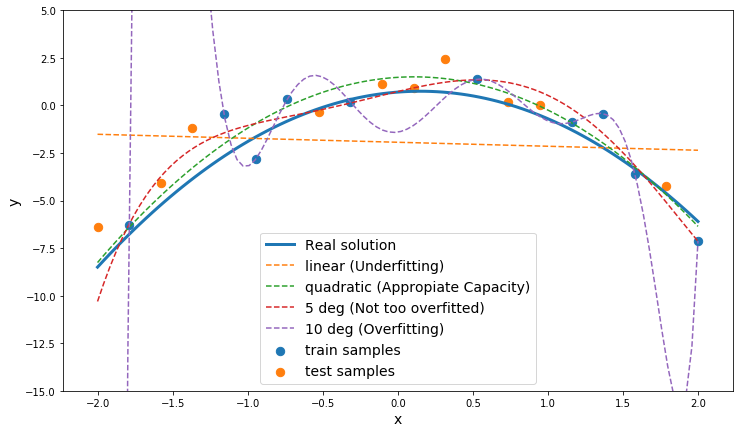

In [9]:
print("Generalization errors")
print("linear: "+str(error1))
print("quadratic: "+str(error2))
print("deg5: "+str(error3))
print("deg10: "+str(error4))
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(x_plot, linear_function(w, aug_x_plot), label="Real solution", lw=3)
ax.scatter(x_train, y_train, label="train samples", s=70)
ax.scatter(x_test, y_test, label="test samples", s=70)
ax.plot(x_plot, p1(x_plot),'--' ,label="linear (Underfitting)")
ax.plot(x_plot, p2(x_plot),'--' , label="quadratic (Appropiate Capacity)")
ax.plot(x_plot, p3(x_plot),'--' , label="5 deg (Not too overfitted)" )
ax.plot(x_plot, p4(x_plot),'--' , label="10 deg (Overfitting)")
ax.legend(fontsize=14)
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.set_ylim([-15, 5])
plt.show()

In the last plot, we can see that the linear model does not have enough capacity to express the relation between x and y. Quadratic and deg 5 polynomial are good enough to find the relation. Some times, a high capacity model with a large family of functions that can represent (this is representational capacity), does not find the best solution during the optimization process, these additional limitations reduce the capacity of the actual solution, this is called the effective capacity. In the case of deg 10 polynomial, the capacity of the model is too high, so fits perfectly the train data but has a poor generalization ability.

The capacity of the model can be modified by modifying the model or changing the effective capacity by adding restrictions to the loss function. This is called Regularization.

# Regularization
## Regularized least squares
In this example, we'll use the weight decay regularization, which tends to choose parameters on the solution space that are close to the origin (small euclidean norm). We just need to modify the loss function by adding one term:

\begin{equation}
\begin{split}
 J(w) = & MSE + R \\
 = & \frac{1}{N} \| \hat{Y} - Y \|^{2}_{2} + \lambda \| w \|^{2}_{2}
\end{split}
\end{equation}

Let's see how the solution looks by taking the gradient of J with respect to w

\begin{equation}
\nabla_{w} J(w) = 0 \\
2X^{T}Xw-2X^{T}Y + 2\lambda w=0 \\
w = (X^{T}X + \lambda I)^{-1}X^{T}Y
\end{equation}

As we can see in the last expression, now we take the inverse of the correlation matrix plus the identity ponderated by $\lambda$. This means that we are adding convexity to the problem because the eigenvalues of this new matrix are going to be bigger if we increase $\lambda$ (we are making the matrix less singular), the convexity of this new manifold as a combination of a parabola because of the regularization term and the convexity of the original problem without the regularization. The optimization will tend to choose small norm w if we increase $\lambda$

Now, let's see an example by fitting a high capacity model but with this regularization term in the loss function

In [10]:
# Same model as before
w = np.array([-2, 0.6, 0.7])[...,np.newaxis]
noise = 1.2
n_points = 20
train_size = 10
test_size = n_points - train_size
np.random.seed(0)    

x_samples = np.linspace(-2, 2, n_points)[..., np.newaxis]
augmented_x = np.concatenate([x_samples**2, x_samples, x_samples**0], axis=1)
y_samples = linear_function(w, augmented_x) + np.random.normal(loc=0.0, scale=noise, size=(n_points,1))
x_plot = np.linspace(-2,2,100)[..., np.newaxis]
aug_x_plot = np.concatenate([x_plot**2, x_plot, x_plot**0], axis=1)

indexes = np.arange(start=0, stop=n_points,step=1)
np.random.shuffle(indexes)
train_index = indexes[:train_size]
test_index = indexes[train_size:]
x_train = x_samples[train_index, ...]
aug_x_train = augmented_x[train_index, ...]
y_train = y_samples[train_index, ...]
x_test = x_samples[test_index, ...]
aug_x_test = augmented_x[test_index, ...]
y_test = y_samples[test_index, ...]

# Now we do it for high capacity model
deg = 10
x_deg = []
for i in range(deg+1):
    x_deg.append(x_samples**(deg-i))
x_deg = np.concatenate(x_deg, axis=1)
x_deg_train = x_deg[train_index, ...]
x_deg_test = x_deg[test_index, ...]

In [11]:
# Least square solution
reg_values = [10**7, 0.5, 0]
labels = ["Too large lambda (Underfitting)", "appropiate lambda", "no regularization (Overfitting)"]
reg_w = []
solution = []
for i, lam in enumerate(reg_values):
    # we save the regularized solution for each lambda
    reg_w.append(inv(x_deg_train.T @ x_deg_train + lam*np.identity(deg+1)) @ x_deg_train.T @ y_train)
    solution.append(np.poly1d(reg_w[-1][:,0]))

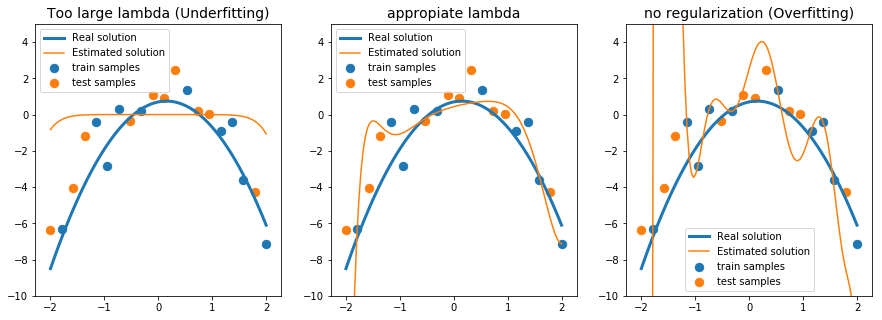

In [12]:
fig, ax_array = plt.subplots(1,3,figsize=(15,5))
for i, lam in enumerate(reg_values):
    ax_array[i].plot(x_plot, linear_function(w, aug_x_plot), label="Real solution", lw=3)
    ax_array[i].scatter(x_train, y_train, label="train samples", s=70)
    ax_array[i].scatter(x_test, y_test, label="test samples", s=70)
    p = solution[i]
    ax_array[i].plot(x_plot, p(x_plot), label="Estimated solution")
    ax_array[i].set_ylim([-10, 5])
    ax_array[i].set_title(labels[i], fontsize=14)
    ax_array[i].legend()
    
plt.show()

The last plot shows how the regularization term modifies the effective capacity of the model. For very high $\lambda$ (left plot), the solutions are reduced to a very small region of the original space, so the capacity of the model is reduced too much and produce underfitting on the data. For very small $\lambda$ (right plot), there is no penalization for the size of the weights and the model is able to look for solutions using its original capacity, so the model overfits. For a medium $\lambda$ (middle plot), the effective capacity is probably close to the necessary one to find the correct function of the data. 

## Probabilistic Perspective of Regularization, Maximum a Posteriori

In this case, we will add information about the distribution of the parameters p(w) as a prior knowledge, by using Bayes' theorem to modify the likelihood in the following way:

\begin{equation}
\begin{split}
P(\theta \mid D) = & \frac{P(D \mid \theta) P(\theta)}{P(D)} \\
\propto & P(D \mid w) P(w)
\end{split}
\end{equation}

Where $D$ is the data and $\theta$ the parameters of the model. $P(\theta)$ is called "prior" since it is prior knowledge added to the model about how the parameters distribute, in some application, the designer of the model might have some idea where to look for the parameters for a particular problem. $P(D \mid \theta)$ is the likelihood as we already know. $P(\theta \mid D)$ is called "posterior" probability, it is the distribution of the parameters for a given data, basically  an update of our prior after seeing evidence of the real process (samples from the data-generating process)

Let's consider our previous model and assume a gaussian distribution for the prior of the parameters

$$ \hat{y} = w^{T}x + \epsilon \hspace{0.5cm} \text{with} \hspace{0.5cm} \epsilon \sim \mathcal{N}(0, \sigma) \hspace{0.5cm} \text{with} \hspace{0.5cm} p(w) \sim \mathcal{N(0, \tau)} $$

Then, the posterior probability of the parameters is proportional to:
\begin{equation}
\begin{split}
P(w \mid Y,X,\sigma , \tau) \propto P(Y \mid X, w, \sigma) P(w \mid \tau)
\end{split}
\end{equation}

If we find $w$ where the posterior probability is maximized, it means that for the given dataset and the prior knowledge, there is a high probability that the model with that value of $w$ is the one that produce the data. So the solution to the maximum a posteriori (MAP) is:

\begin{equation}
\begin{split}
\hat{w} = & \text{argmax}_{w}  P(w \mid Y, X, \sigma, \tau) \\
= & \text{argmin}_{w} -\log(P(w \mid Y, X, \sigma, \tau))
\end{split}
\end{equation}

Something interesting happens (again) when we work a little bit this expression

\begin{equation}
\begin{split}
-\log(P(w \mid Y, X, \sigma, \tau)) = & -\sum_{i=1}^{N}\log \mathcal{N}(y_{i}, wx_{i}, \sigma)-\log \mathcal{N}(w; 0, \tau) \\
= & n \log \sqrt{2 \pi} \sigma + \sum_{i=1}^{N} \left ( \frac{(y_{i}-wx_{i})^{2}}{2\sigma^{2}} \right ) + n\log \sqrt{2 \pi \tau} + \sum_{i=1}^{N}\left ( \frac{w^{2}}{2 \tau^{2}} \right ) \\
\propto & \| \hat{Y} - Y \|^{2}_{2} + \frac{N \sigma^{2}}{2 \tau^{2}} \| w \|^{2}_{2} \hspace{0.2cm} \text{check this math please}
\end{split}
\end{equation}

Regularized least mean squared is the same as maximum a posteriori with gaussian noise and gaussian prior! The amount of regularization, in this case, is controlled by the width of the gaussian prior $\tau$

# Hyperparameters and Cross-validation

Many models and regularization factors are subject to hyperparameters that must be chosen by the designer. With hyperparameters I mean, for example, the lambda for regularization, the degree of the polynomial, number of layer and neurons in a neural network,  gamma coefficient for support vector machines, etc.

We should choose the hyperparameters that produce a better model to generalize over new data (test set). I good way to do this is used cross-validation, which is a procedure to have a better estimation of the generalization performance. Some times we do not have too many examples, so the random choice for the test set could be very sensitive to the realization, and of course, the generalization performance estimation too, cross-validation try to fix this problem by doing the following:

#### K-fold cross-validation

For a given dataset $D$, performance metric F and number of subsets k, we do:
- Split D into k mutually exclusive subsets $D_{i}$ with $\bigcup_{i=1}^{K} D_{i} = D$
- For i from 1 to k:
    - train the model with $D\backslash D_{i}$
    - Compute performance F over $D_{i}$
- end for
- Return performance

In [13]:
def cross_validation(lam, x_subsets, y_subsets):
    train_error = []
    test_error = []
    for i, x_test in enumerate(x_subsets):
        x_train = np.concatenate([x for j, x in enumerate(x_subsets) if j!=i], axis=0)
        y_train = np.concatenate([y for j, y in enumerate(y_subsets) if j!=i], axis=0)
        y_test = y_subsets[i]
        w = inv(x_train.T @ x_train + lam*np.identity(x_train.shape[1])) @ x_train.T @ y_train
        p = np.poly1d(w[:,0])
        test_error.append(np.linalg.norm(y_test[:, 0] - p(x_test[:, -2]))**2/len(y_test))
        train_error.append(np.linalg.norm(y_train[:, 0] - p(x_train[:, -2]))**2/len(y_train))
    return np.array(train_error), np.array(test_error)

def kfold_cv(x_data, y_data, lam_array, kfold=4):
    x_subsets = np.split(x_data, kfold)
    y_subsets = np.split(y_data, kfold)
    
    train_error_mean = []
    test_error_mean = []
    train_error_std = []
    test_error_std = []
    for j, lam in enumerate(lam_array):
        print('\r{}'.format(float(j/len(lam_array))*100), end='')
        train_error, test_error = cross_validation(lam, x_subsets, y_subsets)
        train_error_mean.append(np.mean(train_error))
        train_error_std.append(np.std(train_error))
        test_error_mean.append(np.mean(test_error))
        test_error_std.append(np.std(test_error))
    
    return [np.array(train_error_mean), 
           np.array(train_error_std), 
           np.array(test_error_mean), 
           np.array(test_error_std)]

In [14]:
lam_array = np.linspace(0.01, 10**8, 10000)
one_over_lambda = 1.0/lam_array
train_error_mean, train_error_std, test_error_mean, test_error_std = kfold_cv(x_deg, y_samples, lam_array)
optimal_lambda = lam_array[np.where(test_error_mean==np.amin(test_error_mean))[0]]

99.9900000000000143

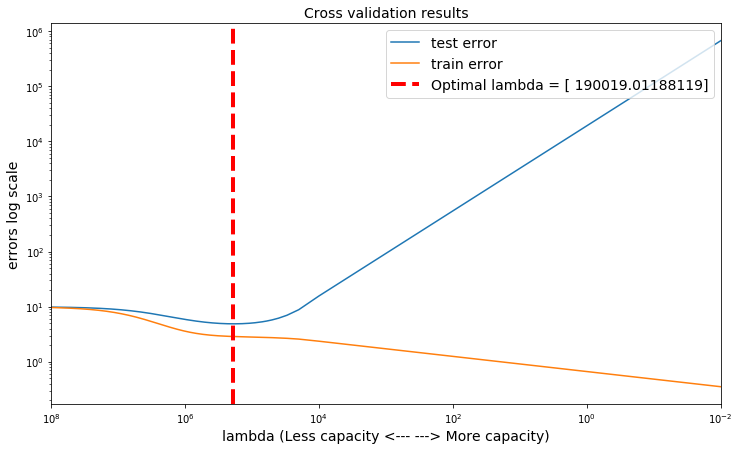

In [15]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(lam_array, test_error_mean, label="test error")
ax.plot(lam_array, train_error_mean, label="train error")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("lambda (Less capacity <--- ---> More capacity)", fontsize=14)
ax.set_ylabel("errors log scale", fontsize=14)
ax.set_title("Cross validation results", fontsize=14)
ax.set_xlim([np.amax(lam_array), np.amin(lam_array)])
ax.axvline(x=optimal_lambda, color='r', linestyle='--',
           lw=4, label="Optimal lambda = "+str(optimal_lambda))
ax.legend(fontsize=14)
plt.show()

It is easy to see how the parameter $\lambda$ change the effective capacity and produce a smooth transition between underfitting (left side of the optimal $\lambda$, too large $\lambda$) and overfitting (right side of the optimal $\lambda$, too small $\lambda$) regime. 

In [16]:
deg_w = (inv(x_deg_train.T @ x_deg_train + optimal_lambda*np.identity(deg+1)) @ x_deg_train.T @ y_train)
deg_p = np.poly1d(w[:,0])

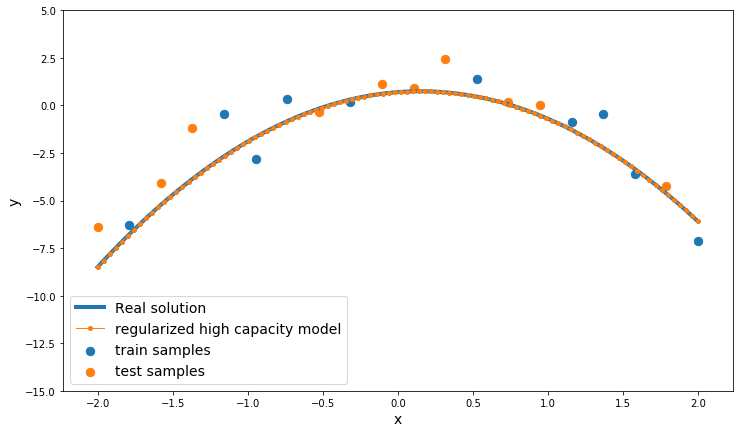

In [17]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(x_plot, linear_function(w, aug_x_plot), label="Real solution", lw=4)
ax.scatter(x_train, y_train, label="train samples", s=70)
ax.scatter(x_test, y_test, label="test samples", s=70)
ax.plot(x_plot, deg_p(x_plot),'-o' ,label="regularized high capacity model", lw=1,ms=4)
ax.legend(fontsize=14)
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.set_ylim([-15, 5])
plt.show()